In [14]:
import requests
import pandas as pd
import bs4

# 함수 정의
def fetch_data(date, hour):
    url = f"http://openapi.seoul.go.kr:8088/4f546a53616b6d73313130416d464b49/xml/VolInfo/1/5/C-06/{date}/{hour}/"
    response = requests.get(url)
    xml_obj = bs4.BeautifulSoup(response.content, 'html.parser')
    rows = xml_obj.find_all('row')
    
    row_list = []
    name_list = []
    value_list = []

    # XML 데이터 수집
    for i in range(0, len(rows)):
        columns = rows[i].find_all()
        for j in range(0, len(columns)):
            if i == 0:
                # 컬럼 이름 값 저장
                name_list.append(columns[j].name)
            # 컬럼의 각 데이터 값 저장
            value_list.append(columns[j].text)
        # 각 행의 value값 전체 저장
        row_list.append(value_list)
        # 데이터 리스트 값 초기화
        value_list = []
    
    # DataFrame 생성
    df = pd.DataFrame(row_list, columns=name_list)
    return df

# 날짜 및 시간 리스트
dates = ["20240501","20240508","20240515","20240522","20240529",
         "20240605","20240612","20240619","20240626",
         "20240703","20240710","20240717","20240724","20240731","20240807","20240814",
         "20240821","20240828","20240904","20240911","20240918","20240925","20241002",
         "20241009","20241016","20241023","20241030","20241106", "20241113", "20241120"]
hour = "18"

# 여러 날짜에 대한 데이터를 저장
all_data = pd.DataFrame()
for date in dates:
    temp_df = fetch_data(date, hour)
    all_data = pd.concat([all_data, temp_df], ignore_index=True)

# 결과 출력
print(all_data)


c:\Users\user\anaconda3\envs\deep_min\Lib\html\parser.py:171: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


    spot_num       ymd  hh io_type lane_num  vol
0       C-06  20240501  18       1        1  222
1       C-06  20240501  18       1        2  404
2       C-06  20240501  18       1        3  300
3       C-06  20240501  18       2        1  239
4       C-06  20240501  18       2        2  390
..       ...       ...  ..     ...      ...  ...
145     C-06  20241120  18       1        1  617
146     C-06  20241120  18       1        2  736
147     C-06  20241120  18       1        3  636
148     C-06  20241120  18       2        1  334
149     C-06  20241120  18       2        2  445

[150 rows x 6 columns]


In [27]:
# 데이터프레임 초기화
consolidated_data = pd.DataFrame()

# 3개 단위로 데이터를 묶어서 처리
for i in range(0, len(all_data), 3):
    # 현재 3개 데이터를 추출
    temp_group = all_data.iloc[i:i+3]
    
    # 공통 값은 첫 번째 데이터 기준으로 사용
    spot_num = temp_group['spot_num'].iloc[0]
    ymd = temp_group['ymd'].iloc[0]
    hh = temp_group['hh'].iloc[0]
    io_type = temp_group['io_type'].iloc[0]
    
    # lane_num을 1로 고정하고, vol 값을 합산
    lane_num = 1
    total_vol = temp_group['vol'].astype(int).sum()  # vol 값을 숫자로 변환 후 합산
    
    # 통합된 데이터를 새로운 데이터프레임에 추가
    consolidated_data = pd.concat([consolidated_data, 
                                    pd.DataFrame({'spot_num': [spot_num], 
                                                  'ymd': [ymd], 
                                                  'hh': [hh], 
                                                  'io_type': [io_type], 
                                                  'lane_num': [lane_num], 
                                                  'vol': [total_vol]})], 
                                   ignore_index=True)

# 결과 출력
print(consolidated_data)
# vol 열의 평균값 계산
vol_mean = consolidated_data['vol'].mean()

# 결과 출력
print(f"vol의 평균값: {vol_mean:.2f}")



   spot_num       ymd  hh io_type  lane_num   vol
0      C-06  20240501  18       1         1   926
1      C-06  20240501  18       2         1  1261
2      C-06  20240508  18       1         1  1785
3      C-06  20240508  18       2         1  1026
4      C-06  20240515  18       1         1   713
5      C-06  20240522  18       1         1  2009
6      C-06  20240522  18       2         1  1406
7      C-06  20240529  18       1         1  1818
8      C-06  20240529  18       2         1  1887
9      C-06  20240605  18       1         1  1575
10     C-06  20240612  18       1         1  2058
11     C-06  20240612  18       2         1  1364
12     C-06  20240619  18       1         1  1771
13     C-06  20240619  18       2         1  1738
14     C-06  20240626  18       1         1  1496
15     C-06  20240703  18       1         1  1942
16     C-06  20240703  18       2         1  1313
17     C-06  20240710  18       1         1  1774
18     C-06  20240710  18       2         1  1835


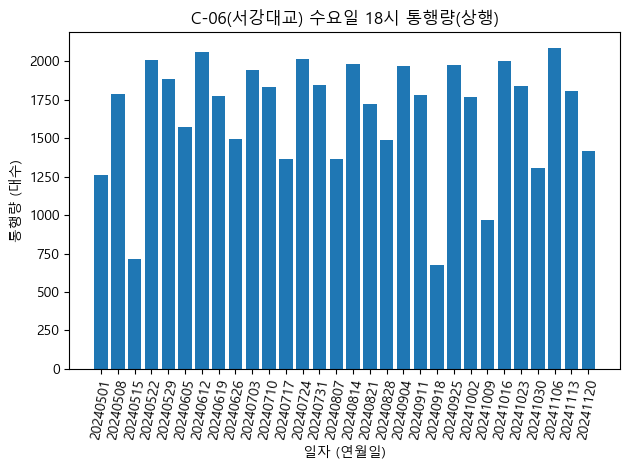

In [18]:
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")

# 막대 그래프 그리기
plt.bar(consolidated_data['ymd'], consolidated_data['vol'])
plt.xlabel('일자 (연월일)')
plt.ylabel('통행량 (대수)')
plt.title('C-06(서강대교) 수요일 18시 통행량(상행)')
plt.xticks(rotation=80)  # x축 레이블 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()



In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 데이터 준비
# consolidated_data의 'vol' 값을 사용
data = consolidated_data['vol'].values.astype(float)

# Min-Max Scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

# 학습 데이터(X_train)와 테스트 데이터(y_test) 생성
train_data = data_scaled[:-1]  # 마지막 데이터를 제외한 학습 데이터
test_data = data_scaled[-1]    # 마지막 데이터를 테스트 데이터로 사용

# 학습 데이터 입력(X)과 출력(y) 생성
seq_length = 29
X_train = []
y_train = []

# 학습 데이터를 시퀀스 형태로 변환
for i in range(len(train_data) - seq_length):
    X_train.append(train_data[i:i + seq_length])  # 29개의 시퀀스 데이터
    y_train.append(train_data[i + seq_length])   # 다음 값

X_train = torch.tensor(X_train, dtype=torch.float32)  # (Batch, Sequence, Feature)
y_train = torch.tensor(y_train, dtype=torch.float32)  # (Batch, Output)

# 테스트 데이터 준비
X_test = torch.tensor(train_data[-seq_length:], dtype=torch.float32).view(1, -1, 1)  # (1, Sequence, Feature)
y_test = torch.tensor(test_data, dtype=torch.float32).view(1, 1)  # (1, Output)

# LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)  # LSTM 출력
        out = self.fc(out[:, -1, :])  # 마지막 시점의 출력만 사용
        return out

# 모델 초기화
input_size = 1
hidden_size = 50
num_layers = 1
output_size = 1

model = LSTMModel(input_size, hidden_size, num_layers, output_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 학습
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)  # 학습 데이터로 예측
    loss = criterion(outputs, y_train)  # 손실 계산
    loss.backward()  # 역전파
    optimizer.step()  # 가중치 업데이트

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')

# 테스트: 마지막 데이터 예측
model.eval()
with torch.no_grad():
    prediction = model(X_test)  # 마지막 데이터 예측
    prediction_original = scaler.inverse_transform(prediction.numpy())  # 예측값 복원
    actual_original = scaler.inverse_transform(y_test.numpy())  # 실제 값 복원

# 결과 출력
print(f"예측값 (Prediction): {prediction_original.flatten()[0]:.2f}")
print(f"실제값 (Actual): {actual_original.flatten()[0]:.2f}")


Epoch [10/1000], Loss: 0.114309
Epoch [20/1000], Loss: 0.086317
Epoch [30/1000], Loss: 0.080219
Epoch [40/1000], Loss: 0.077970
Epoch [50/1000], Loss: 0.076717
Epoch [60/1000], Loss: 0.075841
Epoch [70/1000], Loss: 0.075077
Epoch [80/1000], Loss: 0.074321
Epoch [90/1000], Loss: 0.073510
Epoch [100/1000], Loss: 0.072627
Epoch [110/1000], Loss: 0.071703
Epoch [120/1000], Loss: 0.070916
Epoch [130/1000], Loss: 0.070309
Epoch [140/1000], Loss: 0.066799
Epoch [150/1000], Loss: 0.065570
Epoch [160/1000], Loss: 0.070674
Epoch [170/1000], Loss: 0.070115
Epoch [180/1000], Loss: 0.068012
Epoch [190/1000], Loss: 0.065014
Epoch [200/1000], Loss: 0.061292
Epoch [210/1000], Loss: 0.070094
Epoch [220/1000], Loss: 0.062123
Epoch [230/1000], Loss: 0.060089
Epoch [240/1000], Loss: 0.058319
Epoch [250/1000], Loss: 0.055969
Epoch [260/1000], Loss: 0.053733
Epoch [270/1000], Loss: 0.049614
Epoch [280/1000], Loss: 0.074049
Epoch [290/1000], Loss: 0.072595
Epoch [300/1000], Loss: 0.047776
Epoch [310/1000], L

In [34]:
#%%

import requests

url = 'http://openapi.seoul.go.kr:8088/4f546a53616b6d73313130416d464b49/xml/TrafficInfo/1/10/1180041000'

response = requests.get(url)
print(response.content)

from os import name
import xml.etree.ElementTree as et
import pandas as pd
import bs4
from lxml import html
from urllib.parse import urlencode, quote_plus, unquote


xml_obj = bs4.BeautifulSoup(response.content, 'html.parser')
rows = xml_obj.find_all('row')
print(rows)

row_list = []
name_list = []
value_list = []

# xml 안의 데이터 수집
for i in range(0, len(rows)):
    columns = rows[i].find_all()
    #첫째 행 데이터 수집
    for j in range(0,len(columns)):
        if i ==0:
            # 컬럼 이름 값 저장
            name_list.append(columns[j].name)
        # 컬럼의 각 데이터 값 저장
        value_list.append(columns[j].text)
    # 각 행의 value값 전체 저장
    row_list.append(value_list)
    # 데이터 리스트 값 초기화
    value_list=[]

corona_df = pd.DataFrame(row_list, columns=name_list)
print(corona_df.head(19))

# prcs_spd 열만 선택하여 출력
prcs_spd_data = corona_df['prcs_spd']

# 결과 출력
print(prcs_spd_data.values)

b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><TrafficInfo><list_total_count>1</list_total_count><RESULT><CODE>INFO-000</CODE><MESSAGE>\xec\xa0\x95\xec\x83\x81 \xec\xb2\x98\xeb\xa6\xac\xeb\x90\x98\xec\x97\x88\xec\x8a\xb5\xeb\x8b\x88\xeb\x8b\xa4</MESSAGE></RESULT><row><link_id>1180041000</link_id><prcs_spd>29.1</prcs_spd><prcs_trv_time>176</prcs_trv_time></row></TrafficInfo>'
[<row><link_id>1180041000</link_id><prcs_spd>29.1</prcs_spd><prcs_trv_time>176</prcs_trv_time></row>]
      link_id prcs_spd prcs_trv_time
0  1180041000     29.1           176
['29.1']


c:\Users\user\anaconda3\envs\deep_min\Lib\html\parser.py:171: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


In [35]:
print(f'오늘의 예측 이동량: {prediction_original.flatten()[0]:.0f}')
print(f'수요일 평균 이동량: {vol_mean:.2f}')
print(f'현재 장소의 이동 속도: {prcs_spd_data.values}')

오늘의 예측 이동량: 1325
수요일 평균 이동량: 1561.42
현재 장소의 이동 속도: ['29.1']
